<a href="https://colab.research.google.com/github/llbsh/bbs/blob/main/notebooks/Image_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Overlay


In [2]:
# mounting the gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [4]:
# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps


In [5]:
def display_image(image):
  fig = plt.figure(figsize=(10, 8))
  plt.grid(False)
  plt.imshow(image)

def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  
  pil_image = Image.open(image_data)
  print("Image size (original): ", pil_image.size)
  print("Image resize to: ", new_width, new_height)
  # resize the image to the new width and height, some parts of image are cut out.
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename



Image size (original):  (1536, 1024)
Image resize to:  1280 856
Image downloaded to /tmp/tmpsuq8h4m1.jpg.
/tmp/tmpsuq8h4m1.jpg


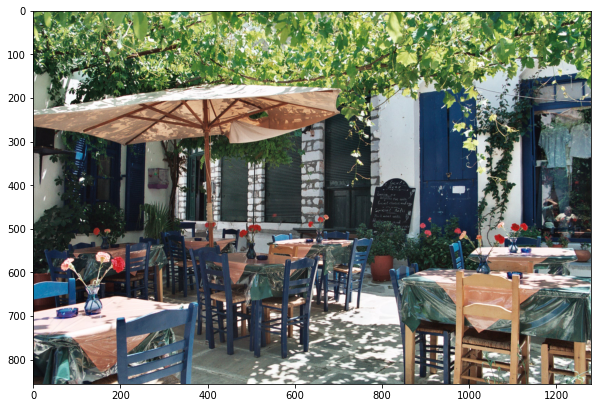

In [6]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)
print(downloaded_image_path)

In [7]:
  # pil_image = Image.open(image_data)
  # pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  # pil_image_rgb = pil_image.convert("RGB")
  # pil_image_rgb.save(filename, format="JPEG", quality=90)
  # print("Image downloaded to %s." % filename)
  # if display:
  #   display_image(pil_image)
  # return filename


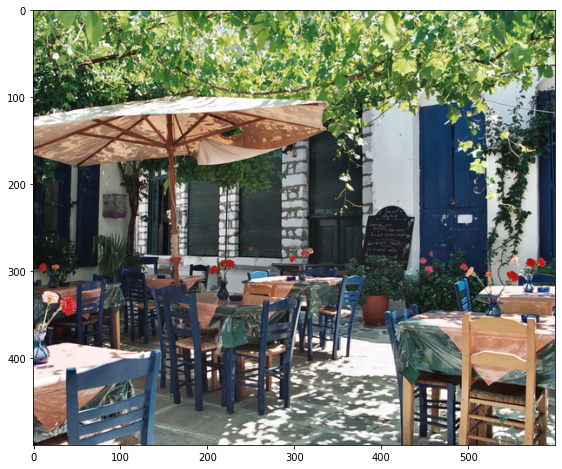

In [8]:
new_width = 600
new_height = 500
pil_image = Image.open(downloaded_image_path)
pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
display_image(pil_image)

Image size (original):  (568, 426)
Image resize to:  300 200
Image downloaded to /tmp/tmpvenjnev4.jpg.
/tmp/tmpvenjnev4.jpg


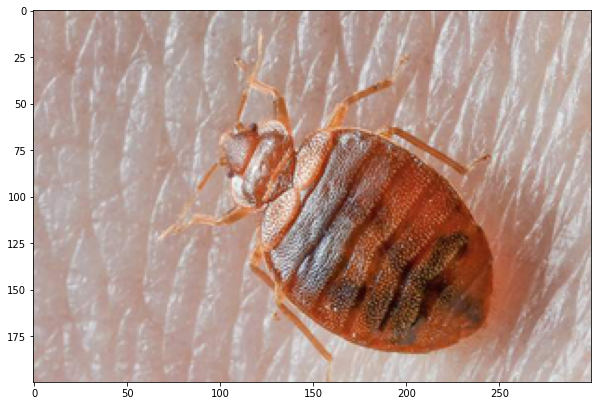

In [9]:
bug_url = "https://www.pestworld.org/media/560895/bed-bug-on-skin.jpg?preset=pestFeature1024"
downloaded_image_path = download_and_resize_image(bug_url, 300, 200, True)
print(downloaded_image_path)

In [10]:
# test_url = "https://www.bedbugbarrier.com.au/wp-content/uploads/bed-bug-dust-mite-size.jpg"
# image_file = download_and_resize_image(test_url, 300, 200, True)
# print(image_file)

# img = Image.open(image_file)
# img = img.convert("RGBA")
# datas = img.getdata()
# print(datas)
# newData = []
# for item in datas:
#     if item[0] == 255 and item[1] == 255 and item[2] == 255:
#         newData.append((255, 255, 255, 0))
#     else:
#         if item[0] > 150:
#             newData.append((0, 0, 0, 255))
#         else:
#             newData.append(item)
#             print(item)


# img.putdata(newData)
# display_image(img)
# img.save("open_science_logo_transparent.png", "PNG")

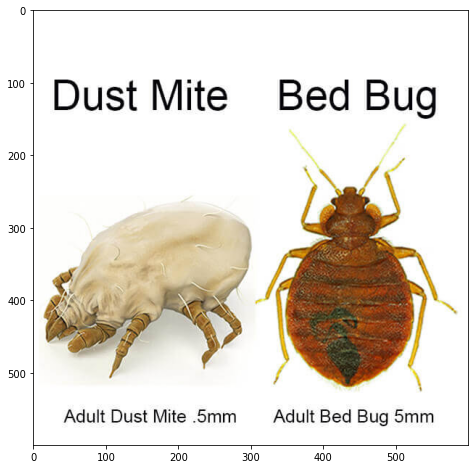

In [11]:
filename = "/content/drive/My Drive/projects/bbs/bug/bed-bug-dust-mite-size.jpg"
pil_image = Image.open(filename)
display_image(pil_image)

# with open('/content/drive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat /content/drive/My\ Drive/foo.txt

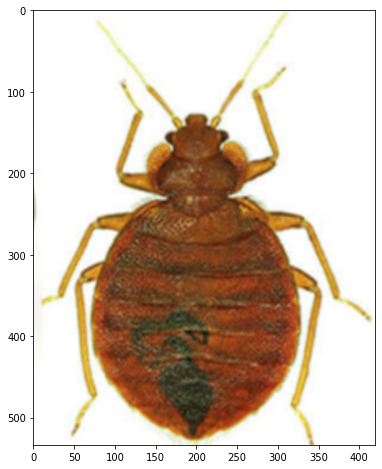

In [12]:
filename = "/content/drive/My Drive/projects/bbs/bug/one_bug.png"
pil_image = Image.open(filename)
display_image(pil_image)



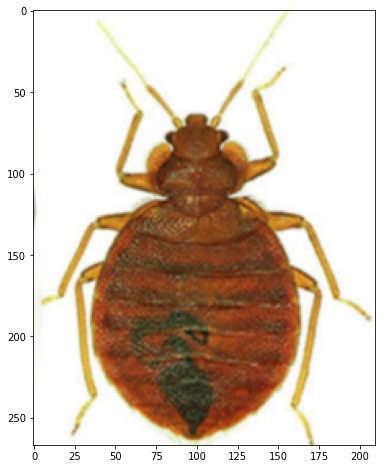

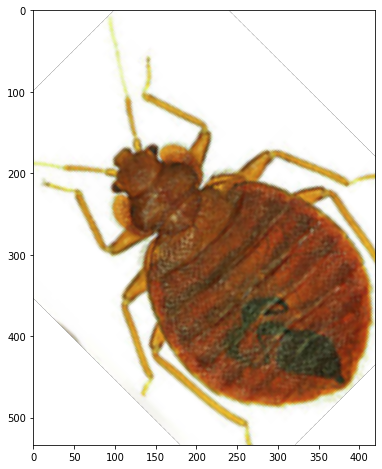

In [18]:
# resize the image: 
im = pil_image
# Provide the target width and height of the image
(width, height) = (im.width // 2, im.height // 2) # resize to half. 
im_resized = im.resize((width, height))
# im = im.resize((width, height))
display_image(im_resized)


In [ ]:
# rotate the image: 
im = pil_image

im = im.rotate(45)
display_image(im)
# def display_image(image):
#   fig = plt.figure(figsize=(10, 8))
#   plt.grid(False)
#   plt.imshow(image)

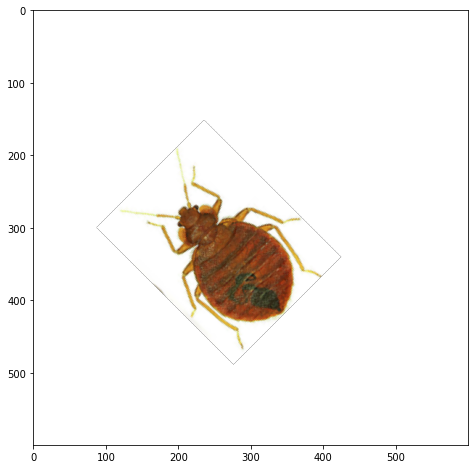

In [25]:
width = 600
height = 600
map_background = Image.new('RGBA', (width, height), (0, 0, 0, 0))
map_background.paste(im_resized, (map_background.width//4, map_background.height//4))

map_background = map_background.rotate(45)
display_image(map_background)